In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
import json
import glob
from collections import defaultdict
import pandas as pd
import seaborn as sns
import os

In [2]:
ctypes = """
Plasma
Macrophage
T
Mast
Endothelial
Pericyte
SMC
Fibroblast
unknown
""".strip().split()
FOLDS = [1,2,3,4,5]

In [3]:
metrics = defaultdict(dict)

for fold in FOLDS:
    for ctype in ctypes:
        with open(f"/scratch/dyl3pc/BPNet/output/model/{ctype}/fold{fold}.metrics.json") as f:
            metrics[fold][ctype] = json.load(f)

In [4]:
### Retina Results
"""
{'bpnet_cts_pearson_peaks_nonpeaks': 0.6929561780826818,
 'bpnet_cts_spearman_peaks_nonpeaks': 0.6762935417448935,
 'binary_auc': 0.8105180906101711,
 'bpnet_cts_pearson_peaks': 0.6822460332630339,
 'bpnet_cts_spearman_peaks': 0.5647475495413053,
 'bpnet_profile_median_jsd_peaks': 0.29371089680511064,
 'bpnet_profile_median_jsd_peaks_randomized': 0.6880808287923185}
"""

"\n{'bpnet_cts_pearson_peaks_nonpeaks': 0.6929561780826818,\n 'bpnet_cts_spearman_peaks_nonpeaks': 0.6762935417448935,\n 'binary_auc': 0.8105180906101711,\n 'bpnet_cts_pearson_peaks': 0.6822460332630339,\n 'bpnet_cts_spearman_peaks': 0.5647475495413053,\n 'bpnet_profile_median_jsd_peaks': 0.29371089680511064,\n 'bpnet_profile_median_jsd_peaks_randomized': 0.6880808287923185}\n"

## Peak + nonpeak Pearson

In [5]:
COLORS = ['#1D1A31', '#6CA2EA', '#B5D33D', '#EB7D5B', 'r']

In [6]:
peak_nonpeak_pearson_df = []

for i in FOLDS:
    for m in ctypes:
        peak_nonpeak_pearson_df.append({"fold":i, 
                                        "ctype":m,
                                       "pearson_r":metrics[i][m]['bpnet_cts_pearson_peaks_nonpeaks']})
        
peak_nonpeak_pearson_df = pd.DataFrame(peak_nonpeak_pearson_df)

In [7]:
peak_nonpeak_pearson_df.head()

,fold,ctype,pearson_r
0,1,Plasma,0.485466
1,1,Macrophage,0.681999
2,1,T,0.575380
3,1,Mast,0.608983
4,1,Endothelial,0.582205


In [8]:
matplotlib.rcParams['figure.figsize'] = 12,4

[]

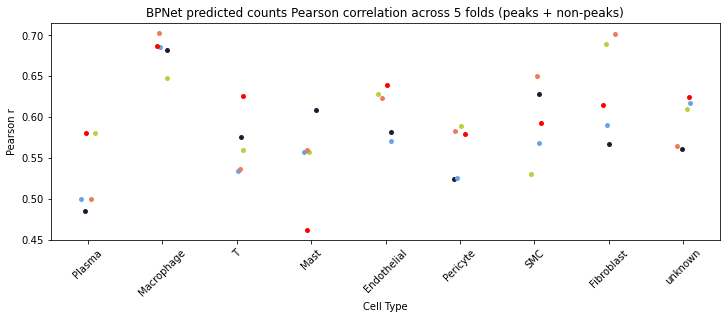

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in FOLDS:
    sns.stripplot(x=peak_nonpeak_pearson_df[peak_nonpeak_pearson_df['fold']==i].ctype, 
                  y=peak_nonpeak_pearson_df[peak_nonpeak_pearson_df['fold']==i].pearson_r, 
                  color=COLORS[i-1],
                  jitter=True)
plt.xticks(rotation=45)
plt.title("BPNet predicted counts Pearson correlation across 5 folds (peaks + non-peaks)")
plt.xlabel("Cell Type")
plt.ylabel("Pearson r")
plt.savefig("./plots/peaks_nonpeaks_pearson.pdf",
           bbox_inches = "tight")
plt.plot()

## Peaks pearson

In [10]:
peak_pearson_df = []

for i in FOLDS:
    for m in ctypes:
        peak_pearson_df.append({"fold":i, 
                                        "ctype":m,
                                       "pearson_r":metrics[i][m]['bpnet_cts_pearson_peaks']})
        
peak_pearson_df = pd.DataFrame(peak_pearson_df)

In [11]:
peak_pearson_df.head()

,fold,ctype,pearson_r
0,1,Plasma,0.637416
1,1,Macrophage,0.701498
2,1,T,0.660507
3,1,Mast,0.736060
4,1,Endothelial,0.714070


In [12]:
matplotlib.rcParams['figure.figsize'] = 12,4

[]

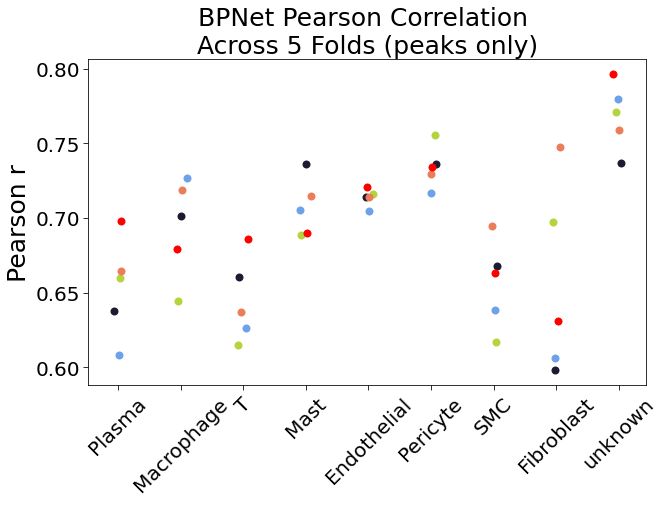

In [13]:
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["lines.markersize"] = 10
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.title_fontsize'] = 13
plt.rcParams['legend.edgecolor'] = 'dimgray'
plt.rcParams["figure.figsize"] = (10,6)


for i in FOLDS:
    sns.stripplot(x=peak_pearson_df[peak_pearson_df['fold']==i].ctype, 
                  y=peak_pearson_df[peak_pearson_df['fold']==i].pearson_r, 
                  color=COLORS[i-1],
                  jitter=True, s=8)

plt.xticks(rotation=45)
plt.title("BPNet Pearson Correlation \nAcross 5 Folds (peaks only)")
plt.xlabel(" ")
plt.ylabel("Pearson r")
plt.savefig("./plots/peaks_pearson.pdf",
           bbox_inches = "tight")
plt.plot()

In [18]:
import numpy as np
np.mean(peak_pearson_df['pearson_r'])

0.6920625862843278

### JSD peaks

In [19]:
jsd_df = []

for i in FOLDS:
    for m in ctypes:
        jsd_df.append({"fold":i, 
                                "ctype":m,
                                "JSD":metrics[i][m]['bpnet_profile_median_jsd_peaks']})
        
jsd_df = pd.DataFrame(jsd_df)

In [20]:
jsd_df.head()

,fold,ctype,JSD
0,1,Plasma,0.588096
1,1,Macrophage,0.429759
2,1,T,0.512789
3,1,Mast,0.621227
4,1,Endothelial,0.554272


In [21]:
plt.rcParams["figure.figsize"] = (10,6)

[]

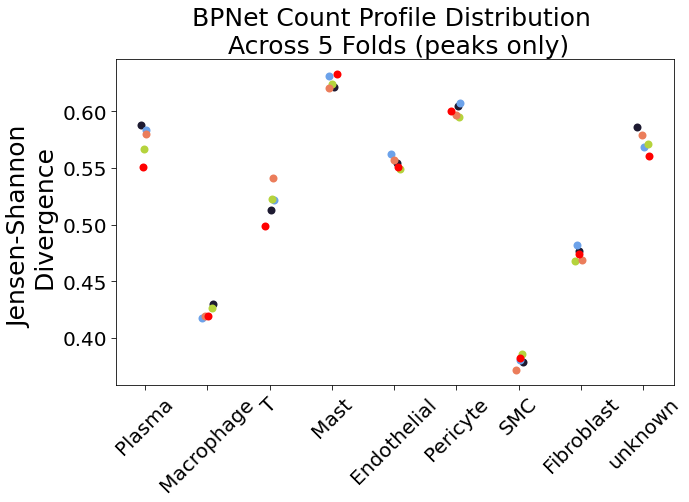

In [22]:
for i in FOLDS:
    sns.stripplot(x=jsd_df[jsd_df['fold']==i].ctype, 
                  y=jsd_df[jsd_df['fold']==i].JSD,
                  jitter=True, s=8, color=COLORS[i-1])
plt.xticks(rotation=45)
plt.title("BPNet Count Profile Distribution \n Across 5 Folds (peaks only)")
plt.xlabel("")
plt.ylabel("Jensen-Shannon \n Divergence")
# plt.savefig("./plots/peaks_JSD.pdf",
#            bbox_inches = "tight")
plt.plot()

In [24]:
np.mean(jsd_df['JSD'])

0.5248061996852222

# Original

## Peak + nonpeak Pearson

In [51]:
COLORS = ['#1D1A31', '#6CA2EA', '#B5D33D', '#EB7D5B', 'r']

In [23]:
peak_nonpeak_pearson_df = []

for i in range(FOLDS):
    for m in ctypes:
        peak_nonpeak_pearson_df.append({"fold":i, 
                                        "ctype":m,
                                       "pearson_r":metrics[i][m]['bpnet_cts_pearson_peaks_nonpeaks']})
        
peak_nonpeak_pearson_df = pd.DataFrame(peak_nonpeak_pearson_df)

In [24]:
peak_nonpeak_pearson_df.head()

,fold,ctype,pearson_r
0,0,Rodbipolar,0.749658
1,0,Microglia,0.755856
2,0,Mullerglia,0.752462
3,0,Astrocyte,0.747576
4,0,Rod,0.692956


In [25]:
matplotlib.rcParams['figure.figsize'] = 12,4

[]

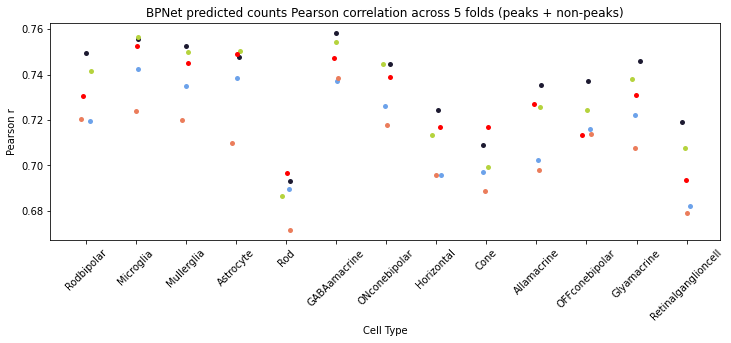

In [53]:
for i in range(FOLDS):
    sns.stripplot(x=peak_nonpeak_pearson_df[peak_nonpeak_pearson_df['fold']==i].ctype, 
                  y=peak_nonpeak_pearson_df[peak_nonpeak_pearson_df['fold']==i].pearson_r, 
                  color=COLORS[i],
                  jitter=True)
plt.xticks(rotation=45)
plt.title("BPNet predicted counts Pearson correlation across 5 folds (peaks + non-peaks)")
plt.xlabel("Cell Type")
plt.ylabel("Pearson r")
plt.savefig("./plots/peaks_nonpeaks_pearson.pdf",
           bbox_inches = "tight")
plt.plot()

## Peaks pearson

In [28]:
peak_pearson_df = []

for i in range(FOLDS):
    for m in ctypes:
        peak_pearson_df.append({"fold":i, 
                                        "ctype":m,
                                       "pearson_r":metrics[i][m]['bpnet_cts_pearson_peaks']})
        
peak_pearson_df = pd.DataFrame(peak_pearson_df)

In [29]:
peak_pearson_df.head()

,fold,ctype,pearson_r
0,0,Rodbipolar,0.699817
1,0,Microglia,0.788811
2,0,Mullerglia,0.707307
3,0,Astrocyte,0.758669
4,0,Rod,0.682246


In [30]:
matplotlib.rcParams['figure.figsize'] = 12,4

[]

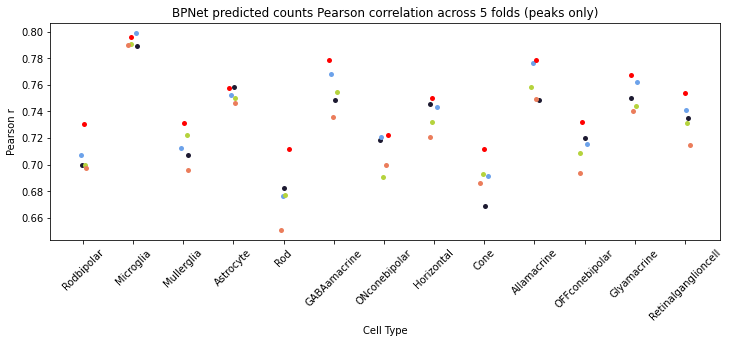

In [54]:
for i in range(FOLDS):
    sns.stripplot(x=peak_pearson_df[peak_pearson_df['fold']==i].ctype, 
                  y=peak_pearson_df[peak_pearson_df['fold']==i].pearson_r, 
                  color=COLORS[i],
                  jitter=True)

plt.xticks(rotation=45)
plt.title("BPNet predicted counts Pearson correlation across 5 folds (peaks only)")
plt.xlabel("Cell Type")
plt.ylabel("Pearson r")
plt.savefig("./plots/peaks_pearson.pdf",
           bbox_inches = "tight")
plt.plot()

### JSD peaks

In [36]:
jsd_df = []

for i in range(FOLDS):
    for m in ctypes:
        jsd_df.append({"fold":i, 
                                "ctype":m,
                                "JSD":metrics[i][m]['bpnet_profile_median_jsd_peaks']})
        
jsd_df = pd.DataFrame(jsd_df)

In [37]:
jsd_df.head()

,fold,ctype,JSD
0,0,Rodbipolar,0.525024
1,0,Microglia,0.627609
2,0,Mullerglia,0.466951
3,0,Astrocyte,0.644648
4,0,Rod,0.293711


In [38]:
matplotlib.rcParams['figure.figsize'] = 12,4

[]

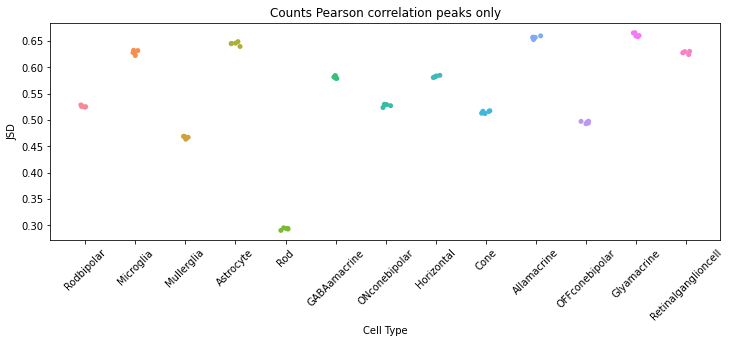

In [39]:
sns.stripplot(x=jsd_df.ctype, 
              y=jsd_df.JSD, 
              jitter=True)
plt.xticks(rotation=45)
plt.title("Counts Pearson correlation peaks only")
plt.xlabel("Cell Type")
plt.ylabel("JSD")
# plt.savefig("./plots/peaks_JSD.pdf",
#            bbox_inches = "tight")
plt.plot()